# CHURN RATE PREDICTION FOR A MULTI-NATIONAL BANK

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
bank_data = pd.read_csv("Bank Customer Churn Prediction.csv",index_col=[0])

In [3]:
bank_data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Checking Data

In [5]:
bank_data.shape

(10000, 11)

In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [7]:
# Statistical data
bank_data.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# check for null values
bank_data.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [9]:
# drop id column
bank_data.drop(columns='products_number',axis=1,inplace=True)
bank_data.head()

,credit_score,country,gender,age,tenure,balance,credit_card,active_member,estimated_salary,churn
customer_id,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


In [10]:
# columns renamed
bank_data.columns = ['Credit score','Country','Gender','Age','Tenure',
                     'Balance','Credit Card','Active member',
                     'Salary','Churn']
bank_data.head()

,Credit score,Country,Gender,Age,Tenure,Balance,Credit Card,Active member,Salary,Churn
customer_id,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


# Analysis

In [11]:
a = bank_data.nunique()
uni= pd.DataFrame(a,columns=['No. of Value'])
uni

,No. of Value
Credit score,460
Country,3
Gender,2
Age,70
Tenure,11
Balance,6382
Credit Card,2
Active member,2
Salary,9999
Churn,2


In [12]:
# Converting Credit score, Salary, Balance Column into Categorical value

In [15]:
# Credit score categorical column
# 300-629 Bad
# 630-689 Fair
# 690-719 Good
# 720-850 Excellent

In [18]:
bank_data['Credit Score Category'] = pd.cut(bank_data['Credit score'],bins=[0,629,689,719,850],labels=['Bad','Fair','Good','Excellent'])

bank_data['Salary Range'] = pd.cut(bank_data['Salary'],bins=[0,19999,44999,139999,199999,249999,300000],
                                   labels=['BPL','Low','Middle Class','Upper Middle','High income','High class'])

bank_data['Balance Range'] = pd.cut(bank_data['Balance'],bins=[-1,999,4999,19999,99999,299999],
                                    labels=['Insufficient','Low','sufficient','Good','Excellent'])

In [20]:
bank_data.head()

,Credit score,Country,Gender,Age,Tenure,Balance,Credit Card,Active member,Salary,Churn,Credit Score Category,Salary Range,Balance Range
customer_id,,,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,101348.88,1,Bad,Middle Class,Insufficient
15647311,608,Spain,Female,41,1,83807.86,0,1,112542.58,0,Bad,Middle Class,Good
15619304,502,France,Female,42,8,159660.80,1,0,113931.57,1,Bad,Middle Class,Excellent
15701354,699,France,Female,39,1,0.00,0,0,93826.63,0,Good,Middle Class,Insufficient
15737888,850,Spain,Female,43,2,125510.82,1,1,79084.10,0,Excellent,Middle Class,Excellent


In [21]:
# again check for Na Value
bank_data.isnull().sum()

Credit score             0
Country                  0
Gender                   0
Age                      0
Tenure                   0
Balance                  0
Credit Card              0
Active member            0
Salary                   0
Churn                    0
Credit Score Category    0
Salary Range             0
Balance Range            0
dtype: int64

In [22]:
bank_data = bank_data[['Gender','Age','Country','Tenure','Salary','Salary Range','Balance','Balance Range',
                       'Credit score','Credit Score Category','Credit Card','Active member','Churn']]

In [23]:
bank_data.head()

,Gender,Age,Country,Tenure,Salary,Salary Range,Balance,Balance Range,Credit score,Credit Score Category,Credit Card,Active member,Churn
customer_id,,,,,,,,,,,,,
15634602,Female,42,France,2,101348.88,Middle Class,0.00,Insufficient,619,Bad,1,1,1
15647311,Female,41,Spain,1,112542.58,Middle Class,83807.86,Good,608,Bad,0,1,0
15619304,Female,42,France,8,113931.57,Middle Class,159660.80,Excellent,502,Bad,1,0,1
15701354,Female,39,France,1,93826.63,Middle Class,0.00,Insufficient,699,Good,0,0,0
15737888,Female,43,Spain,2,79084.10,Middle Class,125510.82,Excellent,850,Excellent,1,1,0


# Reading Through the data

GENDER

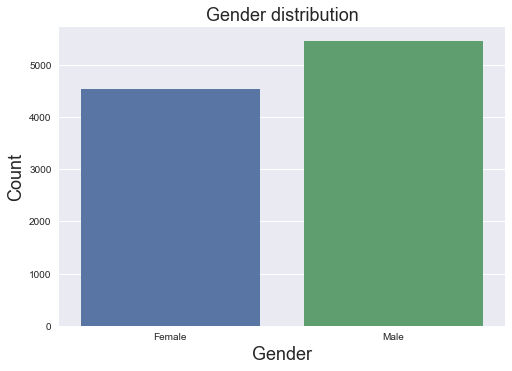

In [27]:
plt.style.use('seaborn')
sn.countplot(data=bank_data,x='Gender')
plt.xlabel('Gender',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.title('Gender distribution',fontsize=18)
plt.show()

AGE

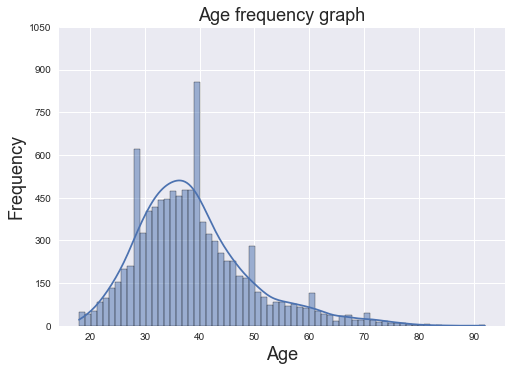

In [34]:
sn.histplot(data=bank_data,x='Age',palette='plasma',kde=True)
plt.yticks(np.arange(0, 1200, step=150))
plt.xlabel('Age',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.title('Age frequency graph',fontsize=18)
plt.show()

COUNTRY

In [35]:
# analysis on 'country' column
bank_data.Country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

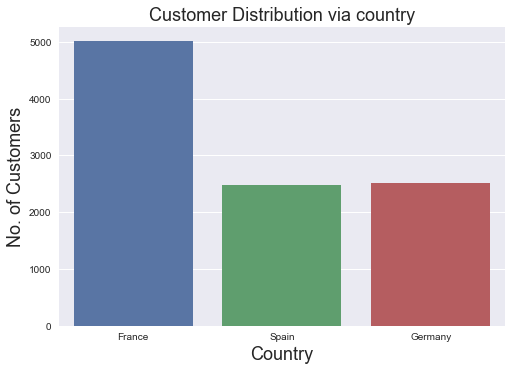

In [37]:
# visualizing the data
sn.countplot(data=bank_data,x='Country')
plt.xlabel('Country',fontsize=18)
plt.ylabel('No. of Customers',fontsize=18)
plt.title('Customer Distribution via country',fontsize=18)
plt.show()

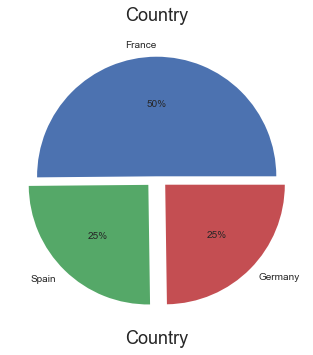

In [38]:
plt.pie(bank_data['Country'].value_counts(),labels=['France','Spain','Germany'],
        autopct='%.0f%%',explode=[0.0,0.1,0.1])

plt.xlabel('Country', fontsize=18)
plt.title('Country',fontsize=18)
plt.show()

TENURE

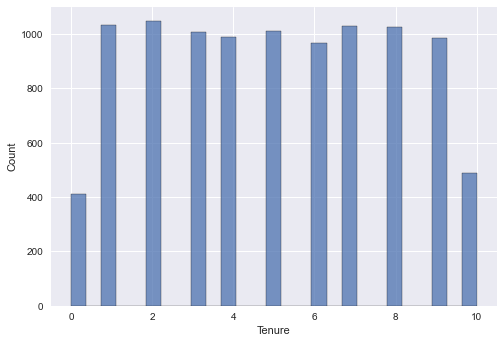

In [41]:
sn.histplot(data=bank_data,x='Tenure')
plt.show()

SALARY

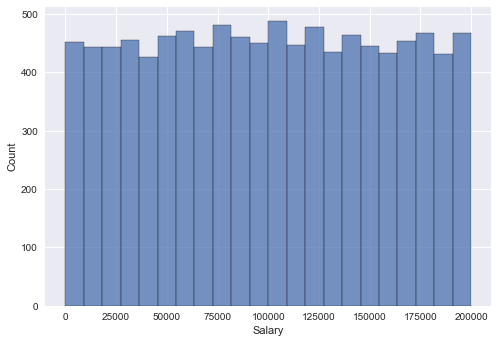

In [42]:
sn.histplot(data=bank_data,x='Salary')
plt.show()

CATEGORY CREATED

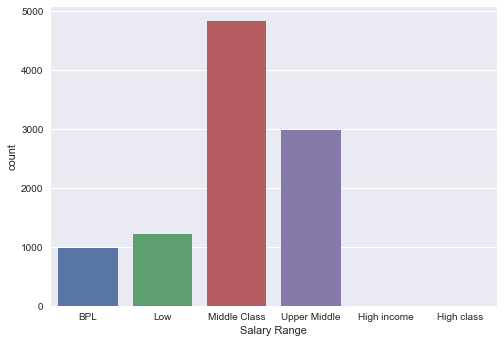

In [43]:
sn.countplot(data=bank_data,x='Salary Range')
plt.show()

BALANCE

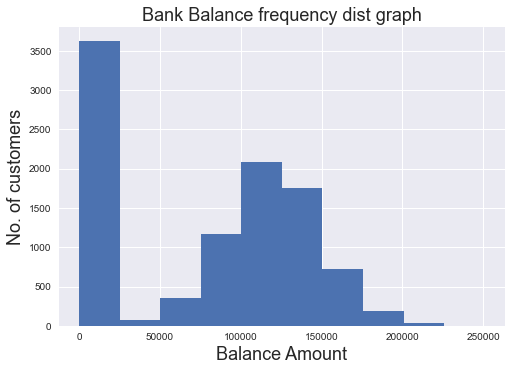

In [44]:
plt.hist(x=bank_data['Balance'])
plt.xlabel('Balance Amount',fontsize=18)
plt.ylabel('No. of customers',fontsize=18)
plt.title('Bank Balance frequency dist graph',fontsize=18)
plt.show()

CREDIT SCORE

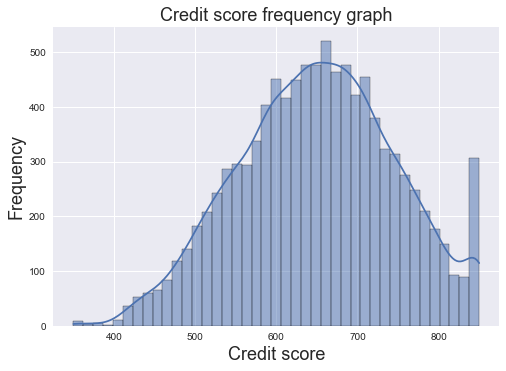

In [45]:
sn.histplot(data=bank_data,x='Credit score',kde=True)
plt.xlabel('Credit score', fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.title('Credit score frequency graph',fontsize=18)
plt.show()

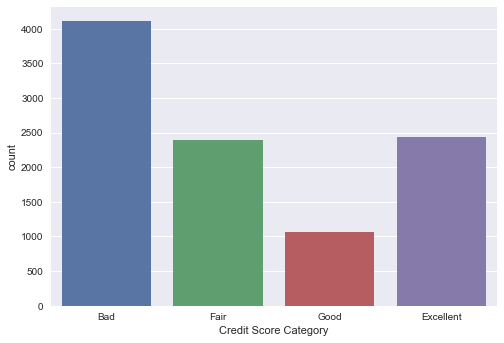

In [46]:
sn.countplot(data=bank_data,x='Credit Score Category')
plt.show()

CREDIT CARD

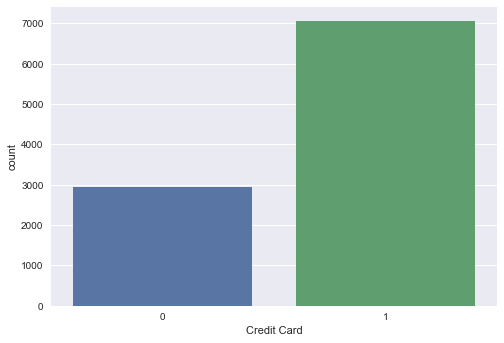

In [47]:
sn.countplot(data=bank_data,x='Credit Card')
plt.show()

ACTIVE MEMBERS

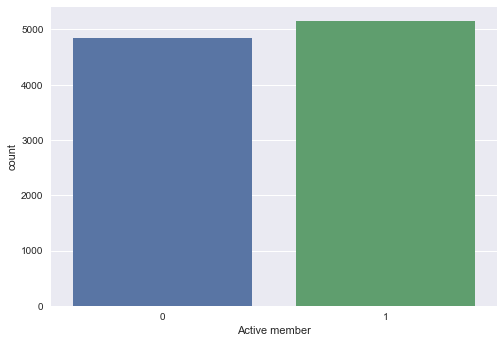

In [48]:
sn.countplot(data=bank_data,x='Active member')
plt.show()

CHURN

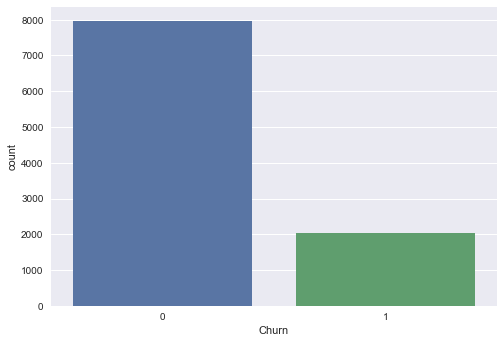

In [49]:
sn.countplot(data=bank_data,x='Churn')
plt.show()

# Relationship of One variable with another 

CREDIT SCORE VS ACTIVE CARD USERS

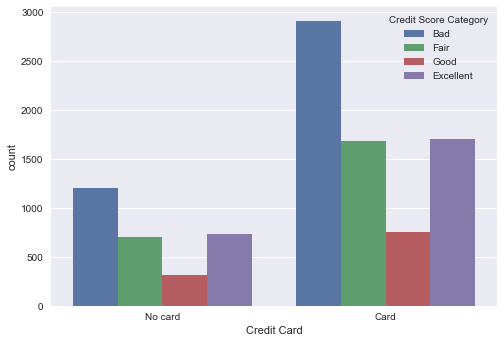

In [51]:
sn.countplot(data=bank_data,x='Credit Card', hue='Credit Score Category')
plt.xticks(ticks=[0,1],labels=['No card','Card'])
plt.show()

SALARY VS CURRENT USER

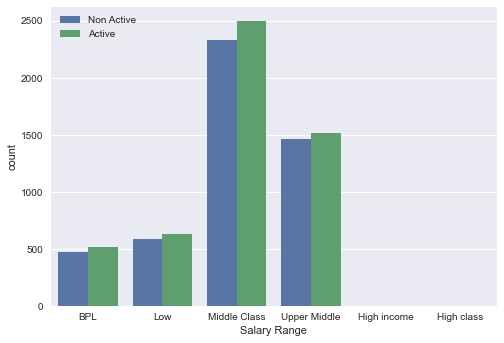

In [52]:
sn.countplot(data=bank_data,x='Salary Range', hue='Active member')
plt.legend(['Non Active','Active'])
plt.show()

COUNTRY, GENDER, SALARY

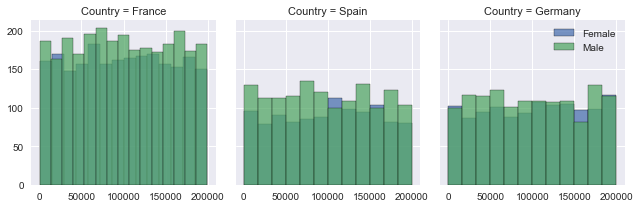

In [54]:
a= sn.FacetGrid(bank_data,col='Country',hue='Gender')
a.map_dataframe(sn.histplot,x='Salary',palette='plasma')
plt.legend()
plt.show()

COUNTRY, GENDER, BALANCE

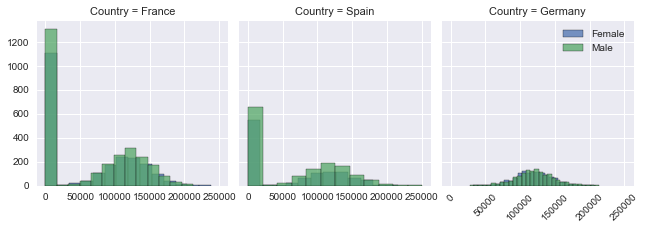

In [55]:
b= sn.FacetGrid(bank_data,col='Country',hue='Gender')
b.map_dataframe(sn.histplot,x='Balance',palette='plasma')
plt.xticks(rotation=45)
plt.legend()
plt.show()

BALANCE VS SALARY

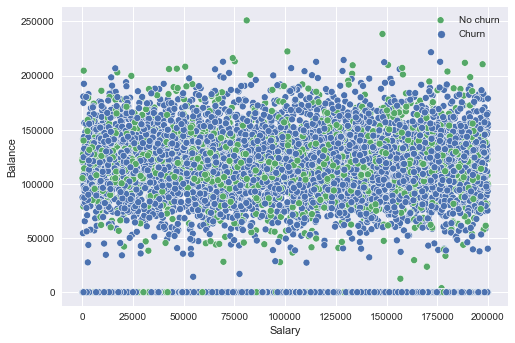

In [56]:
sn.scatterplot(data=bank_data,x='Salary',y='Balance',hue='Churn')
plt.legend(labels=['No churn','Churn'])
plt.show()

# REPORT / OBSERVATIONS

Both gender have shown almost similar patterns. There is not much difference in their income or behaviour.

Number of customers in 'Insufficient Balance' category is astronomical, but almost None comes from Germany.

In Germany large number of customers belong to middle / upper middle class but None from Upper or High Class.

France has highest average salary rate and insufficient balance rate as well. France head office needs to re-asses their minimum balance policy.

Balance and salary have no corrleation between them. Scatter plot is all over the place.